In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [706]:
data = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')

In [707]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


# Data Cleaning

## Detecting and handling Null values

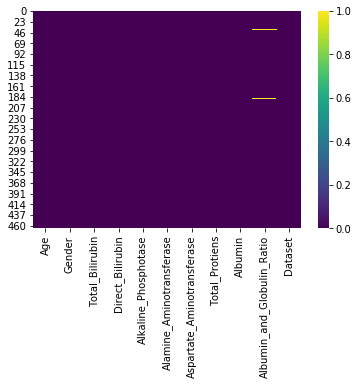

In [708]:
sns.heatmap(data.isnull(), cmap='viridis')

In [709]:
data.dropna(inplace=True, axis=0)

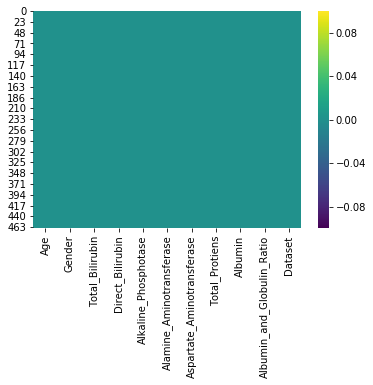

In [710]:
sns.heatmap(data.isnull(), cmap='viridis')

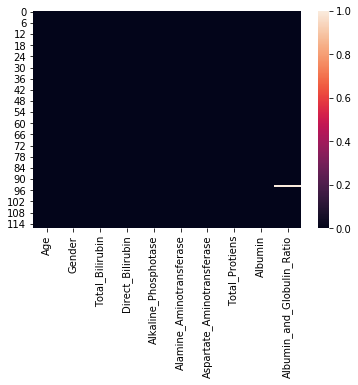

In [711]:
sns.heatmap(datatest.isnull())

In [712]:
datatest.dropna(inplace=True, axis=0)

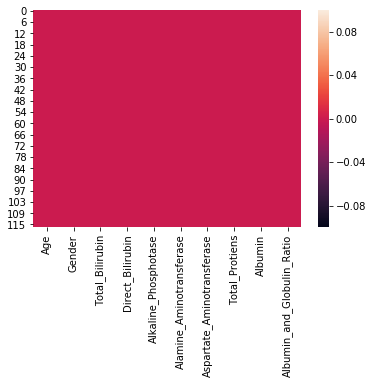

In [713]:
sns.heatmap(datatest.isnull())

## Handling categorical values

In [714]:
data['Gender_Male'] = pd.get_dummies(data.Gender, prefix='Gender', drop_first=True)
datatest['Gender_Male'] = pd.get_dummies(datatest.Gender, prefix='Gender', drop_first=True)

In [715]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1,0
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0


# Data Visualisation

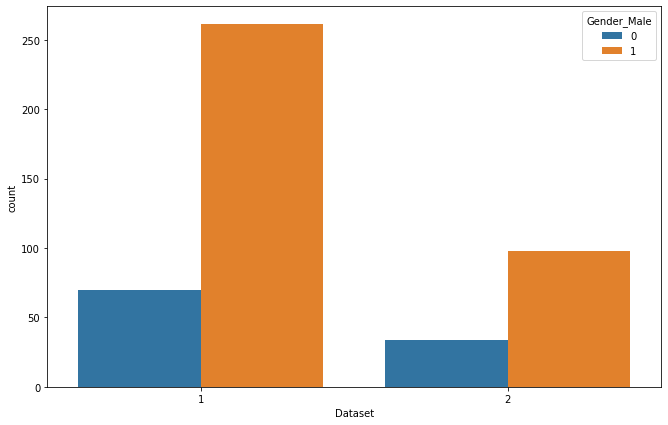

In [720]:
plt.figure(figsize=(11,7))
sns.countplot(data.Dataset, hue=data.Gender_Male)

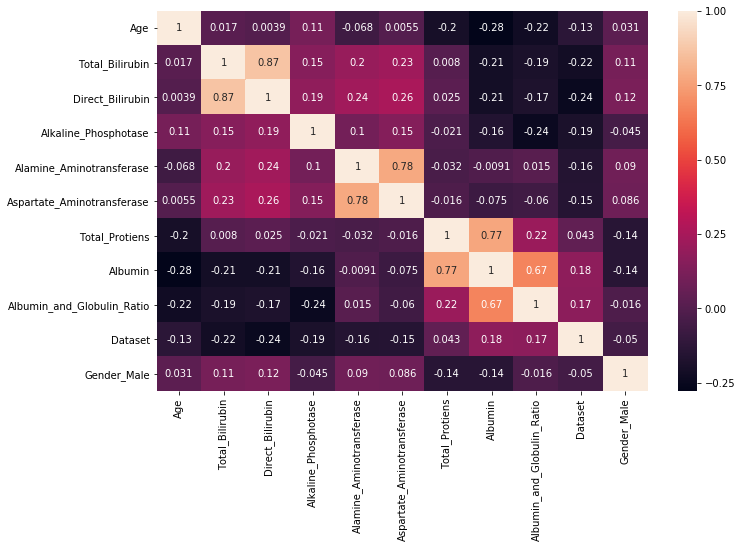

In [721]:
plt.figure(figsize=(11,7))
sns.heatmap(finaldata.corr(), annot=True)

In [722]:
finaldata = data.drop(columns=['Gender'])
finaltestdata = datatest.drop(columns=['Gender'])

In [723]:
X.head()

,Age,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,60,6.3,118,114,6.6,3.7,1.27,1
1,31,0.8,21,16,6.0,3.0,1.00,0
2,60,19.6,46,52,6.1,2.0,0.40,1
3,34,8.7,58,138,5.8,2.4,0.70,1
4,26,0.9,16,12,7.0,3.5,1.00,0


In [724]:
Xreal.head()

,Age,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,46,0.8,31,40,7.3,3.8,1.10,1
1,15,0.8,25,66,6.1,3.7,1.50,1
2,66,4.2,15,30,7.1,2.2,0.40,0
3,32,0.6,45,31,7.5,4.3,1.34,1
4,60,2.6,42,37,5.4,2.7,1.00,1


# Train Test Split

In [725]:
X = finaldata.drop(columns=['Direct_Bilirubin', 'Alkaline_Phosphotase', 'Dataset'])
# X = finaldata.drop(columns=['Age', 'Total_Bilirubin','Direct_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Dataset'])
y = finaldata['Dataset']

In [726]:
Xreal = finaltestdata.drop(columns=['Direct_Bilirubin', 'Alkaline_Phosphotase'])
Xreal.head()

,Age,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,46,0.8,31,40,7.3,3.8,1.10,1
1,15,0.8,25,66,6.1,3.7,1.50,1
2,66,4.2,15,30,7.1,2.2,0.40,0
3,32,0.6,45,31,7.5,4.3,1.34,1
4,60,2.6,42,37,5.4,2.7,1.00,1


In [727]:
from sklearn.model_selection import train_test_split

In [728]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Logistic Regression

In [730]:
from sklearn.linear_model import LogisticRegression

In [731]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [732]:
pred = logmodel.predict(X_test)

In [733]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [734]:
# z = pred == y_test
# z.value_counts()/len(z)

len(X_test)
len(Xreal)

116

In [735]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81       106
           2       0.33      0.27      0.30        33

    accuracy                           0.70       139
   macro avg       0.56      0.55      0.55       139
weighted avg       0.68      0.70      0.69       139

0.697841726618705


## Decision Trees and Random Forests

In [736]:
from sklearn.tree import DecisionTreeClassifier

In [737]:
dtree = DecisionTreeClassifier()

In [738]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [739]:
dt_pred = dtree.predict(X_test)

In [740]:
print(confusion_matrix(y_test, dt_pred))

[[72 34]
 [21 12]]


In [741]:
print(classification_report(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           1       0.77      0.68      0.72       106
           2       0.26      0.36      0.30        33

    accuracy                           0.60       139
   macro avg       0.52      0.52      0.51       139
weighted avg       0.65      0.60      0.62       139

0.60431654676259


In [742]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [743]:
predictions = rfc.predict(X_test)

In [744]:
print(confusion_matrix(y_test,predictions))

[[89 17]
 [25  8]]


## Using K-Nearest-Neighbours

In [745]:
from sklearn.neighbors import KNeighborsClassifier

In [746]:
error_score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_score.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

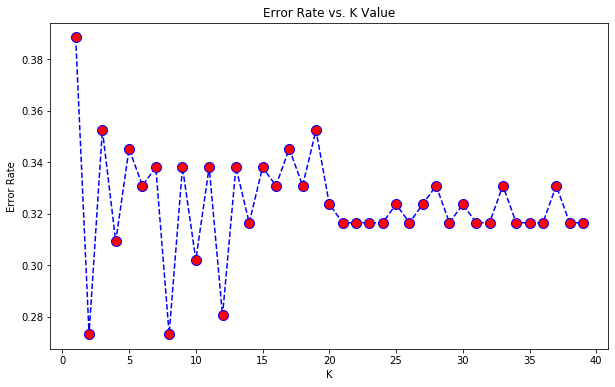

In [747]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [748]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred_k = knn.predict(X_test)

In [749]:
print(confusion_matrix(y_test, pred_k))
print(classification_report(y_test, pred_k))
print(accuracy_score(y_test, pred_k))

[[92 14]
 [24  9]]
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       106
           2       0.39      0.27      0.32        33

    accuracy                           0.73       139
   macro avg       0.59      0.57      0.58       139
weighted avg       0.70      0.73      0.71       139

0.7266187050359713


## Support vector machine

In [750]:
from sklearn.svm import SVC

In [751]:
spp = SVC()

In [752]:
spp.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [753]:
svm_pred = spp.predict(X_test)

In [754]:
print(confusion_matrix(y_test, svm_pred))

[[106   0]
 [ 29   4]]


In [755]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88       106
           2       1.00      0.12      0.22        33

    accuracy                           0.79       139
   macro avg       0.89      0.56      0.55       139
weighted avg       0.84      0.79      0.72       139



In [756]:
from sklearn.model_selection import GridSearchCV

In [757]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 

In [758]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [759]:
grid.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.704, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.694, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.694, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.704, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.694, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.694, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.704, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.694, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.694, total=   0.4s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] ...... C=1000, gamma=1, kernel=linear, score=0.685, total= 1.6min
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.722, total= 1.5min
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.731, total=  44.9s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.685, total= 1.6min
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.722, total= 1.5min
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.731, total=  43.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.685, total= 1.5min
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 35.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [760]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [768]:
grid_pred = grid.predict(Xreal)

In [771]:
print(confusion_matrix(y_test, svm_pred))

[[106   0]
 [ 29   4]]


In [772]:
print(accuracy_score(y_test, svm_pred))

0.7913669064748201


# Hence we can achieve maximum accuracy by training SVM Model

### Exporting Our Prediction CSV

In [773]:
Predicted = pd.read_csv('test.csv')
new_series = pd.Series(grid_pred)
Answer = pd.concat([Predicted, new_series], axis=1)
Answer.rename(columns={0: 'Prediction'}, inplace=True)
export_csv = Answer.to_csv (r'C:\Users\hp\Desktop\Machine Learning Assignment\Assignment 2\Assignment 2\problem_1\AnswerProblem1.csv', index = None, header=True)